In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start= '2012-01-01'
end= '2024-10-01'
stock = 'GOOG'

data= yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [5]:
data.reset_index(inplace=True)

In [6]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.532528,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.603836,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.373516,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.150156,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.465409,233776981
...,...,...,...,...,...,...,...
3201,2024-09-24,164.250000,164.550003,162.029999,163.639999,163.639999,18774100
3202,2024-09-25,162.970001,164.216995,162.774994,162.990005,162.990005,13607900
3203,2024-09-26,165.029999,165.500000,163.500000,163.830002,163.830002,18234500
3204,2024-09-27,163.910004,166.970001,163.830002,165.289993,165.289993,13604300


In [7]:
ma_100_days=data.Close.rolling(100).mean()

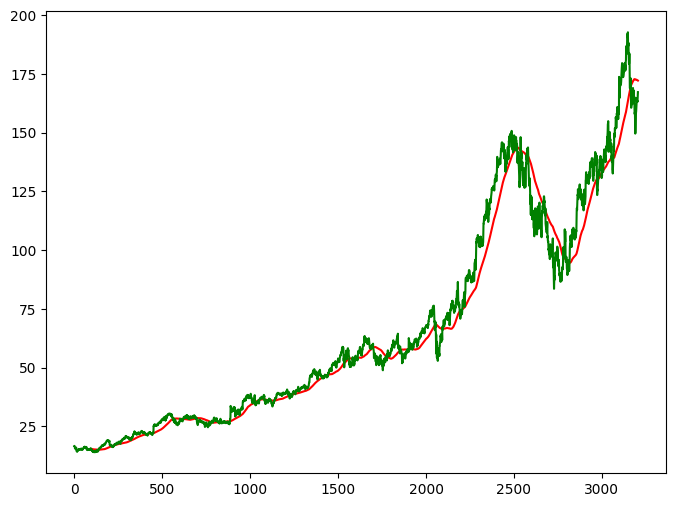

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close, 'g')
plt.show()

In [9]:
ma_200_days=data.Close.rolling(200).mean()

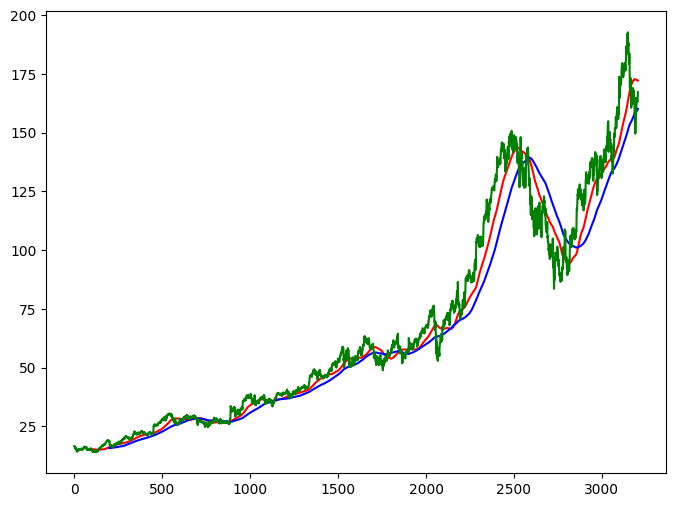

In [10]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close, 'g')
plt.show()

In [11]:
data.dropna(inplace=True)

In [12]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [13]:
data_train.shape[0]

2564

In [14]:
data_test.shape[0]

642

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_train_scale = scaler.fit_transform(data_train)

In [17]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [18]:
x, y = np.array(x), np.array(y)

In [23]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [24]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [26]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 14s 130ms/step - loss: 0.0470
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 28s 363ms/step - loss: 0.0063
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 23s 295ms/step - loss: 0.0051
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 43s 324ms/step - loss: 0.0050
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 25s 320ms/step - loss: 0.0044
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 24s 314ms/step - loss: 0.0039
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - loss: 0.0037
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - loss: 0.0035
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - loss: 0.0027
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - loss: 0.0027
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - loss: 0.0029
Epoch 12/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - loss: 0.0027
Epoch 13/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - loss: 0.0025
Epoch 14/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 114ms/step - loss: 0.0030
Epoch 15/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 116ms/

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [28]:
pas_100_days = data_train.tail(100)

In [29]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [33]:
data_test_scale  =  scaler.fit_transform(data_test)

In [34]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [35]:
y_predict = model.predict(x)

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step


In [36]:
scale =1/scaler.scale_

In [37]:
y_predict = y_predict*scale

In [38]:
y = y*scale

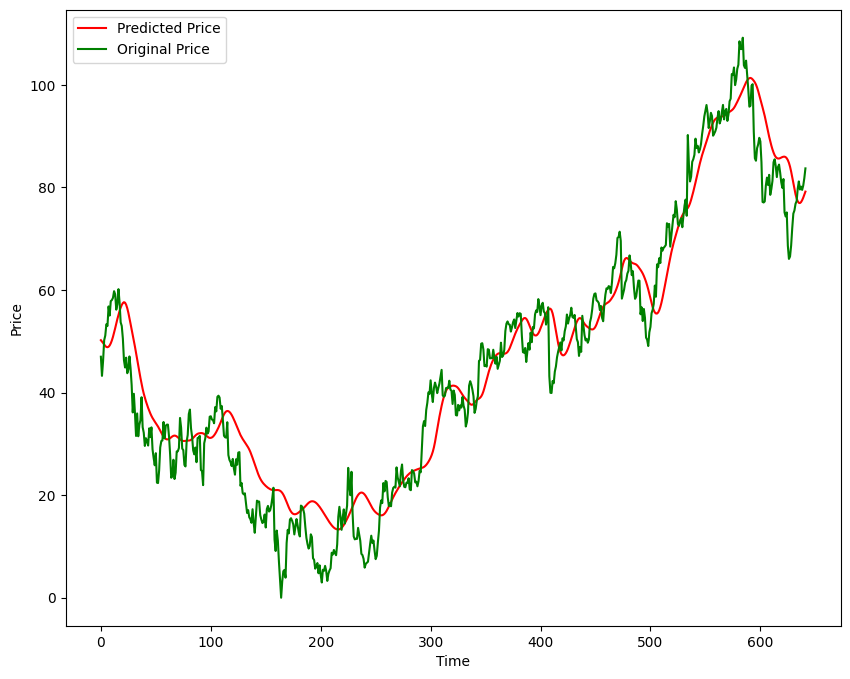

In [39]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [40]:
model.save('Stock Predictions Model.keras')